<a href="https://colab.research.google.com/github/TarunvelVS/GenAI_DL_NLP_Projects/blob/main/LSTM_Model_for_Stock_Market_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import yfinance as yf

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
ticker = 'NVDA'
data = yf.download(ticker, start='2010-01-01', end='2024-06-24')

[*********************100%%**********************]  1 of 1 completed


In [50]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,0.46275,0.4655,0.45275,0.46225,0.46225,800204000
2010-01-05,0.46050,0.4740,0.46050,0.46900,0.46900,728648000
2010-01-06,0.46875,0.4730,0.46425,0.47200,0.47200,649168000
2010-01-07,0.46950,0.4715,0.45925,0.46275,0.46275,547792000
2010-01-08,0.45900,0.4670,0.45625,0.46375,0.46375,478168000


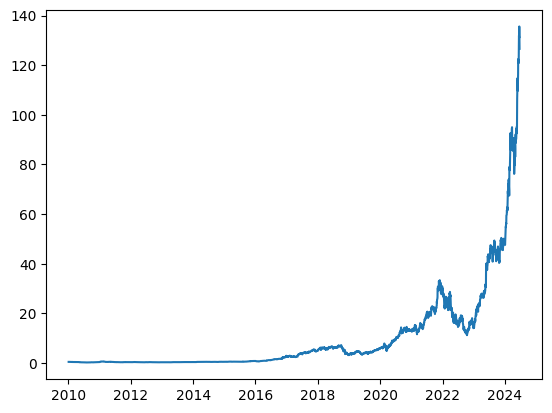

In [51]:
plt.plot(data['Close'])

LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [53]:
def prepare_dataset(data, look_back):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [54]:
look_back = 60

In [55]:
X, y = prepare_dataset(scaled_data, look_back)

In [56]:
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [57]:
# Reshape the data to be 3D for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [59]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [60]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [61]:
# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

Epoch 1/25
72/72 [==============================] - 10s 78ms/step - loss: 5.1071e-05 - val_loss: 2.2608e-05
Epoch 2/25
72/72 [==============================] - 6s 87ms/step - loss: 5.6222e-06 - val_loss: 4.5772e-05
Epoch 3/25
72/72 [==============================] - 5s 71ms/step - loss: 5.1924e-06 - val_loss: 2.3646e-05
Epoch 4/25
72/72 [==============================] - 6s 79ms/step - loss: 4.7054e-06 - val_loss: 3.7915e-05
Epoch 5/25
72/72 [==============================] - 5s 70ms/step - loss: 3.8370e-06 - val_loss: 2.5563e-05
Epoch 6/25
72/72 [==============================] - 5s 72ms/step - loss: 3.5748e-06 - val_loss: 1.8201e-05
Epoch 7/25
72/72 [==============================] - 6s 85ms/step - loss: 3.0732e-06 - val_loss: 4.3004e-05
Epoch 8/25
72/72 [==============================] - 5s 69ms/step - loss: 3.8286e-06 - val_loss: 1.8908e-05
Epoch 9/25
72/72 [==============================] - 8s 107ms/step - loss: 4.1635e-06 - val_loss: 4.1088e-05
Epoch 10/25
72/72 [================

In [63]:
# Make predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

23/23 [==============================] - 1s 20ms/step


In [64]:
# Inverse transform the true stock prices
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

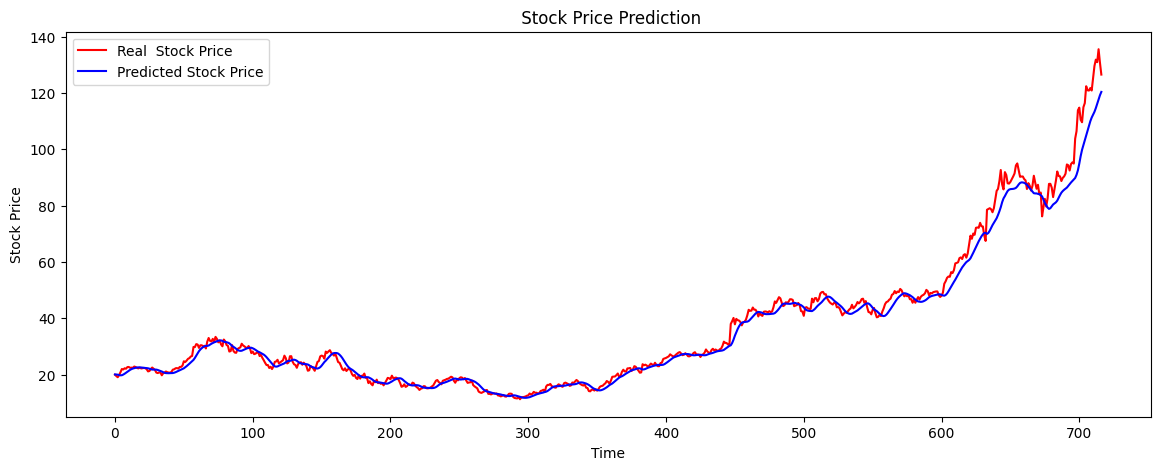

In [66]:
# Plot the results
plt.figure(figsize=(14,5))
plt.plot(real_stock_price, color='red', label='Real  Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()